In [215]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0,10, 0.1)
x = np.sin(5*t)
t = t.reshape(-1,1)
x = x.reshape(-1,1)
# print t.T
print x.T
print x[-1], x[-2], x[-3]

[[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
   0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
  -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
   0.41211849 -0.07515112 -0.54402111 -0.87969576 -0.99999021 -0.87545217
  -0.53657292 -0.0663219   0.42016704  0.80378443  0.99060736  0.93489506
   0.65028784  0.20646748 -0.28790332 -0.71178534 -0.96139749 -0.97562601
  -0.75098725 -0.34248062  0.14987721  0.60553987  0.91294525  0.99682979
   0.83665564  0.471639   -0.00885131 -0.48717451 -0.8462204  -0.99808203
  -0.90557836 -0.59135753 -0.13235175  0.35905835  0.76255845  0.97935764
   0.95637593  0.69924003  0.27090579 -0.22375564 -0.66363388 -0.94103141
  -0.98803162 -0.79312724 -0.40403765  0.08397446  0.55142668  0.88387042
   0.99991186  0.87114     0.52908269  0.05748748 -0.42818267 -0.80901877
  -0.99177885 -0.93171689 -0.64353813 -0.1977988   0.29636858  0.71797459
   0.96379539  0.97364546  0.74511316 

In [216]:
def tridiag(diagonal_minus1, diagonal, diagonal_plus1, k1=-1, k2=0, k3=1):
#     http://stackoverflow.com/questions/5842903/block-tridiagonal-matrix-python
    return np.diag(diagonal_minus1, k1) + np.diag(diagonal, k2) + np.diag(diagonal_plus1, k3)
def make_A(f): 
    # build A
    d = 4*np.ones(len(f))
    dm1 = np.ones(len(f)-1)
    dp1 = np.ones(len(f)-1)
    # centralized difference at most points
    A = tridiag(dm1, d, dp1)
    # forward difference at first point
    A[0,0] = 1
    A[0,1] = 2
    # backward difference at last point
    A[-1,-2] = 2
    A[-1,-1] = 1
#     print A
    return A

# def make_b(f):
#     # build b
#     fp1 = np.delete(f, f[0], axis=0).reshape(-1,1)
#     fp1 = np.vstack((fp1, np.array([[0]])))
#     fm1 = np.delete(f, f[:1], axis=0).reshape(-1,1)
#     print 'Fm1', fm1.shape
#     fm1 = np.vstack((np.array([[0]]), fm1[:-1,:]))
#     print fp1.shape, fm1.shape
#     b = 3*(fp1-fm1)
#     b[0] = -2.5*f[0] + 2*f[1] + 0.5*f[2]
#     b[-1] = 2.5*f[-1] - 2*f[-2] - 0.5*f[-3]
# #     print b
#     return b

def make_b(b):
#     print 'f', b.shape
    bp1 = np.delete(b,0,axis=0)
#     print 'fp1', bp1.shape
#     print bp1.T
    bpp1 = np.vstack((bp1, [[0]]))
#     print 'padded fp1', bpp1.shape
#     print bpp1.T
    bm1 = np.delete(b, -1, axis=0)
#     print 'fm1', bm1.shape
#     print bm1.T
    bmm1 = np.vstack(([[0]],bm1))
#     print 'padded fm1', bmm1.shape
#     print bmm1.T
    bbb = 3*(bpp1-bmm1)
    bbb[0] = -2.5*b[0] + 2*b[1] + 0.5*b[2]
    bbb[-1] = 2.5*b[-1] - 2*b[-2] - 0.5*b[-3]
    return bbb

def pade(f, h=20.0):
    '''
    Pade approximation of the numerical derivative
        Solves A*fp = 1/h*b
        Where A is a sparse matrix
        b is the values at various point
        h is the (uniform) step
        fp is numerical derivative at a point
    '''
    if len(x) <=3:
        print 'ERR: need more points to use pade'
        
    A = make_A(f)
    b = (1/h)*make_b(f)

    

    
    fp = np.linalg.lstsq(A, b)
    return fp[0]

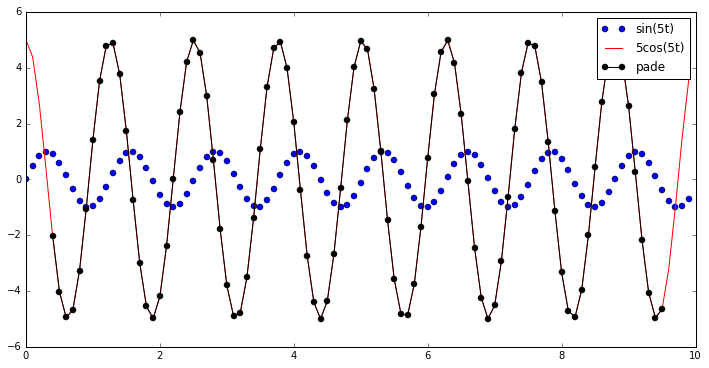

In [217]:
# try numpy.diff
plt.figure(figsize=(12,6))

y2 = pade(x[4:-4], 0.1)
plt.plot(t,x,'bo', label='sin(5t)')
plt.plot(t,5*np.cos(5*t),'r', label='5cos(5t)')
# plt.plot(t[:len(y1)],y1,'rd', label='np.diff')
plt.plot(t[4:-4], y2, 'k-o', label='pade')
plt.legend()

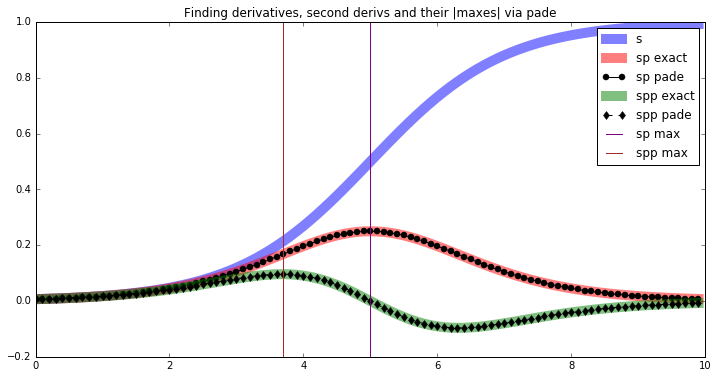

In [218]:
# now try on a sigmoid
def my_sigmoid(t, k=1, A=1, B=0):

    y = 1/(A + np.exp(-(k*t + B)))
    return y

def my_sigmoid_prime(t,k=1,A=1,B=0):
    y = np.exp(-B-k*t)*k/(A+np.exp(-B-k*t))**2
    return y
def my_sigmoid_prime_prime(t,k=1,A=1,B=0):
    y1 = np.exp(-2*B-2*k*t)*k*k/(A+np.exp(-B-k*t))**3
    y2 = np.exp(-B-k*t)*k*k/(A+np.exp(-B-k*t))**2
    return 2*y1-y2

# s
x2 = my_sigmoid(t, B=-5)
# sp exact
y2 = my_sigmoid_prime(t, B=-5)
# sp approx
y3 = pade(x2, 0.1)
# spp exact
z2 = my_sigmoid_prime_prime(t, B=-5)
# spp approx
z3 = pade(y3, 0.1)

t2 = t[np.argmax(np.abs(y3))]
t3 = t[np.argmax(np.abs(z3))]


plt.figure(figsize=(12,6))
plt.plot(t,x2,'b', linewidth=10, alpha=0.5, label='s')
plt.plot(t,y2, 'r', linewidth=10, alpha=0.5, label='sp exact')
plt.plot(t,y3, 'ko-', label='sp pade')
plt.plot(t,z2, 'g', linewidth=10, alpha=0.5, label='spp exact')
plt.plot(t,z3, 'kd--', label='spp pade')
plt.axvline(t2, color='purple', label='sp max')
plt.axvline(t3, color= 'brown', label='spp max')
plt.legend()
plt.title('Finding derivatives, second derivs and their |maxes| via pade')


In [212]:
np.linalg.lstsq?

In [164]:
z = np.arange(10,20,1).reshape(-1,1)
print z.T
print make_A(z)
print make_b(z).T
pade(z,1)

[[10 11 12 13 14 15 16 17 18 19]]
[[ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  4.]]
f (10, 1)
fp1 (9, 1)
padded fp1 (10, 1)
fm1 (9, 1)
padded fm1 (10, 1)
[[3 6 6 6 6 6 6 6 6 3]]
f (10, 1)
fp1 (9, 1)
padded fp1 (10, 1)
fm1 (9, 1)
padded fm1 (10, 1)


array([[ 1.00009205],
       [ 0.99995398],
       [ 1.00009205],
       [ 0.99967784],
       [ 1.00119661],
       [ 0.99553571],
       [ 1.01666053],
       [ 0.93782216],
       [ 1.23205081],
       [ 0.13397459]])

In [89]:
2.5*19-2*18-0.5*17


3.0

In [11]:
# figure out what np.delete does
a = [1,2,3,4,5]
np.delete(a, -1)

array([1, 2, 3, 4])

In [27]:
A = np.zeros((10,10))
# first row
A[0,0:1] = np.array([1,2])
A[-1,-2:1] = np.array([2,1])
A

ValueError: could not broadcast input array from shape (2) into shape (1)

In [30]:
# def tridiag(a, b, c, k1=-1, k2=0, k3=1):
#     return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

a = [1, 1]; b = [2, 2, 2]; c = [3, 3]
B = tridiag(a, b, c)
print B

[[2 3 0]
 [1 2 3]
 [0 1 2]]


In [41]:
x = np.arange(0,10,1)

d = 4*np.ones(len(x))
dm1 = np.ones(len(x)-1)
dp1 = np.ones(len(x)-1)
dd = np.diag(d,0)
ddm1 = np.diag(dm1, -1)
ddp1 = np.diag(dp1, 1)

# A = tridiag(d, dm1, dp1)
print d.shape, dm1.shape, dp1.shape
print dd.shape, ddm1.shape, ddp1.shape
print dd+ddm1+ddp1
print tridiag(dm1,d,dp1)

(10,) (9,) (9,)
(10, 10) (10, 10) (10, 10)
[[ 4.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  4.]]
[[ 4.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  4.]]


In [43]:
d = 4*np.ones(len(x))
dm1 = np.ones(len(x)-1)
dp1 = np.ones(len(x)-1)
#     dd = np.diag(d,0)
#     ddm1 = np.diag(dm1, -1)
#     ddp1 = np.diag(dp1, 1)
# centralized difference at most points
A = tridiag(dm1, d, dp1)
# forward difference at first point
A[0,0] = 1
A[0,1] = 2
A[-1,-2] = 2
A[-1,-1] = 1
print A

[[ 1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  4.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  1.]]


In [114]:
# need to create b
# b[0] = -2.5f0 + 2f1 + 0.5f2
# b[i] = 3(fi-fi-2)
# b[n] = 2.5fn -2fn-1-0.5fn-2

b = np.arange(10,20).reshape(-1,1)

In [123]:
print b.T
print b.shape
bp1 = np.delete(b,0,axis=0)
print bp1.shape
print bp1.T
bpp1 = np.vstack(([[0]], bp1))
print bpp1.shape
print bpp1.T
bm1 = np.delete(b, -1, axis=0)
print bm1.shape
print bm1.T
bmm1 = np.vstack((bm1, [[0]]))
print bmm1.shape
print bmm1.T

[[10 11 12 13 14 15 16 17 18 19]]
(10, 1)
(9, 1)
[[11 12 13 14 15 16 17 18 19]]
(10, 1)
[[ 0 11 12 13 14 15 16 17 18 19]]
(9, 1)
[[10 11 12 13 14 15 16 17 18]]
(10, 1)
[[10 11 12 13 14 15 16 17 18  0]]


In [86]:
from itertools import izip

b = np.arange(10,20).reshape(-1,1)
bp1 = np.delete(b, 0, axis=0).reshape(-1,1)
bp1 = np.vstack((bp1, np.array([[0]])))
bm1 = np.delete(b, b[:1], axis=0).reshape(-1,1)
bm1 = np.vstack((np.array([[0]]), bm1[:-1,:]))

for i, (x,y,z) in enumerate(izip(b, bp1, bm1)):
    print i,x,y,z
print b.shape, bp1.shape, bm1.shape
print bp1
print bm1

0 [10] [11] [0]
1 [11] [12] [10]
2 [12] [13] [11]
3 [13] [14] [12]
4 [14] [15] [13]
5 [15] [16] [14]
6 [16] [17] [15]
7 [17] [18] [16]
8 [18] [19] [17]
9 [19] [0] [18]
(10, 1) (10, 1) (10, 1)
[[11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [ 0]]
[[ 0]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]]


In [68]:
np.delete(b, -1, axis=0)

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18]])

In [220]:
# Ax = b where x=2, y=1
A = np.array([[1,2],[3,4]])
b = np.array([[4],[10]])
x = np.array([[2],[1]])
print np.dot(A, x)
print b

[[ 4]
 [10]]
[[ 4]
 [10]]


In [221]:
print A
print np.invert(A)

[[1 2]
 [3 4]]
[[-2 -3]
 [-4 -5]]


In [222]:
np.dot(np.invert(A), b)

array([[-38],
       [-66]])

In [223]:
np.linalg.lstsq(A,b)

(array([[ 2.],
        [ 1.]]),
 array([], dtype=float64),
 2,
 array([ 5.4649857 ,  0.36596619]))